<a href="https://colab.research.google.com/github/MuhilanRavi/BigMart-Sales-Prediction/blob/feature_update/BigMart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Uploading dataset
uploaded = files.upload()


Saving bigmart.csv to bigmart.csv


In [ ]:
import pandas as pd
import numpy as np

# Loading the dataset in a python dataframe
df = pd.read_csv('bigmart.csv')

print("Dataset loaded successfully!")
print(f"Shape of dataset: {df.shape}")
print("\nFirst 5 rows:")
df.head()


Dataset loaded successfully!
Shape of dataset: (8523, 12)

First 5 rows:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
print(df.isnull().sum())
print(df.dtypes)

print(df.describe())

# frequency of outlet type and item type
print(df['Outlet_Type'].value_counts())
print(df['Item_Type'].value_counts())


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.

/tmp/ipython-input-1226907406.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
/tmp/ipython-input-1226907406.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

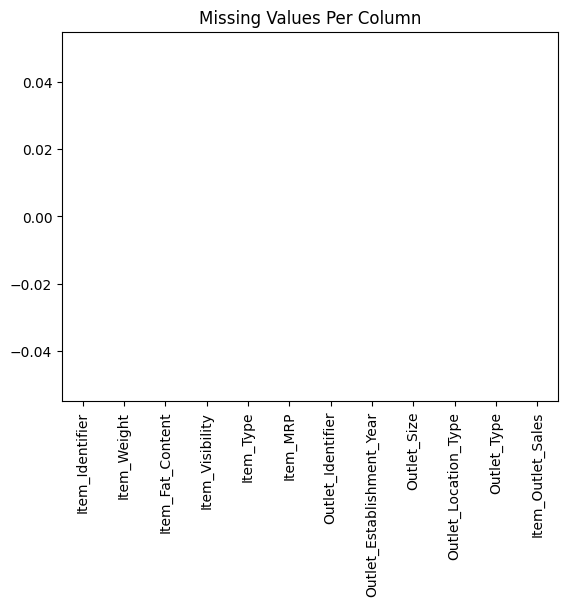

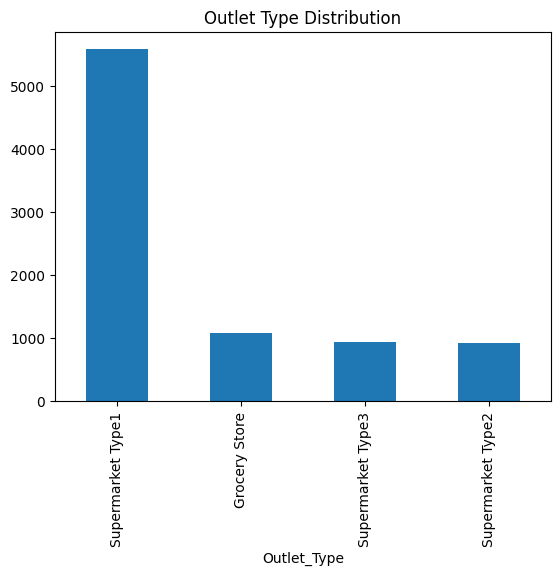

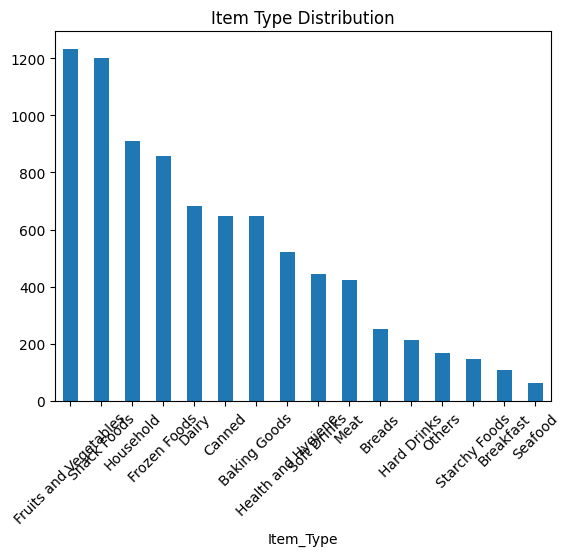

In [ ]:
import matplotlib.pyplot as plt

#filling missing values with mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

#filling missing values with mode
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

# Visualizing missing data for each column
df.isnull().sum().plot(kind='bar', title='Missing Values Per Column')
plt.show()

df['Outlet_Type'].value_counts().plot(kind='bar', title='Outlet Type Distribution')
plt.show()

df['Item_Type'].value_counts().plot(kind='bar', title='Item Type Distribution')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# encoding categorical contents
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
            'Outlet_Location_Type', 'Outlet_Type']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis=1)
y = df['Item_Outlet_Sales']

# splitting data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (6818, 10), Test shape: (1705, 10)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE on test data: {rmse:.2f}")
print(f"R² score on test data: {r2:.2f}")


RMSE on test data: 1080.82
R² score on test data: 0.57


In [ ]:
df['Outlet_Age'] = 2025 - df['Outlet_Establishment_Year']


In [ ]:
import pandas as pd

df['Item_MRP_Bin'] = pd.cut(df['Item_MRP'], bins=[0, 70, 140, 200, 270], labels=['Low', 'Medium', 'High', 'Very High'])


In [ ]:
import numpy as np

df['Item_Visibility_log'] = np.log1p(df['Item_Visibility'])


In [ ]:
itemtype_sales = df.groupby('Item_Type')['Item_Outlet_Sales'].mean()
df['Item_Type_Mean_Sales'] = df['Item_Type'].map(itemtype_sales)


In [ ]:
df['Outlet_Mean_Sales'] = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('mean')
df['Item_Type_Count'] = df.groupby('Item_Type')['Item_Identifier'].transform('count')


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_mrp_bin = LabelEncoder()
df['Item_MRP_Bin_Encoded'] = le_mrp_bin.fit_transform(df['Item_MRP_Bin'])

feature_cols = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility_log', 'Item_Type',
                'Item_MRP', 'Item_MRP_Bin_Encoded', 'Outlet_Age', 'Outlet_Size',
                'Outlet_Location_Type', 'Outlet_Type']

for col in ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

X = df[feature_cols]
y = df['Item_Outlet_Sales']

# Split again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE on test data after feature engineering: {rmse:.2f}")
print(f"R² score on test data after feature engineering: {r2:.2f}")


RMSE on test data after feature engineering: 1086.35
R² score on test data after feature engineering: 0.57


In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R² score: {r2_xgb:.2f}")

print(f"\nComparison:")
print(f"Random Forest RMSE: 1086.35")
print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"Improvement: {1086.35 - rmse_xgb:.2f}")

XGBoost RMSE: 1063.77
XGBoost R² score: 0.58

Comparison:
Random Forest RMSE: 1086.35
XGBoost RMSE: 1063.77
Improvement: 22.58


Top Features by Importance:
                feature  importance
9           Outlet_Type    0.685330
4              Item_MRP    0.128419
6            Outlet_Age    0.084249
5  Item_MRP_Bin_Encoded    0.023298
2   Item_Visibility_log    0.014745
3             Item_Type    0.014227
8  Outlet_Location_Type    0.013782
7           Outlet_Size    0.013468
0           Item_Weight    0.012337
1      Item_Fat_Content    0.010146


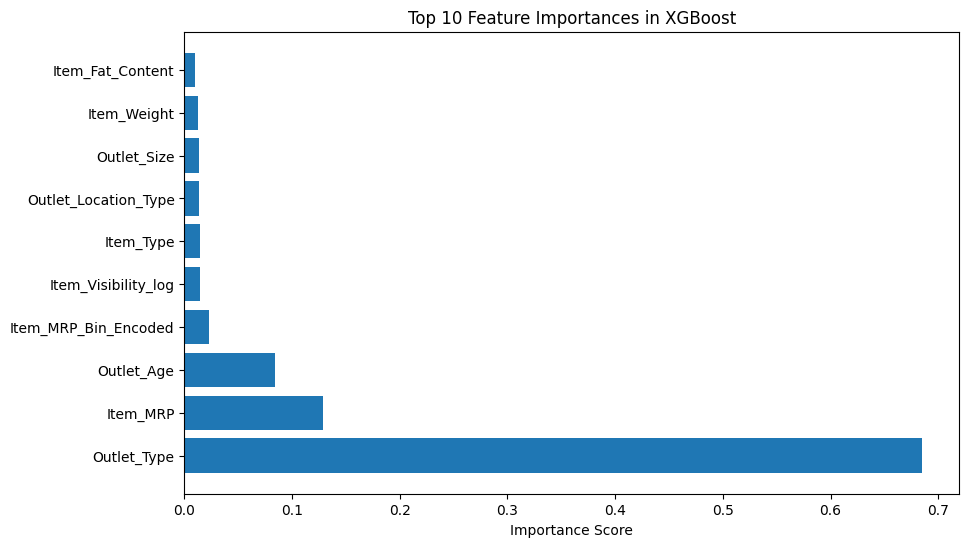

In [ ]:
import matplotlib.pyplot as plt

feature_importance = xgb_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("Top Features by Importance:")
print(importance_df.head(10))

plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'][:10], importance_df['importance'][:10])
plt.title('Top 10 Feature Importances in XGBoost')
plt.xlabel('Importance Score')
plt.show()


In [ ]:
top_features = [
    'Outlet_Type',
    'Item_MRP',
    'Outlet_Age',
    'Item_MRP_Bin_Encoded',
    'Item_Visibility_log',
    'Item_Type',
    'Outlet_Location_Type'
]

# Create new feature matrix with selected features
X_selected = X[top_features]

# Re-split the data
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# Retrain XGBoost with selected features
xgb_selected = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

xgb_selected.fit(X_train_selected, y_train)
y_pred_selected = xgb_selected.predict(X_test_selected)

rmse_selected = np.sqrt(mean_squared_error(y_test, y_pred_selected))
r2_selected = r2_score(y_test, y_pred_selected)

print(f"XGBoost with Feature Selection:")
print(f"RMSE: {rmse_selected:.2f}")
print(f"R² score: {r2_selected:.2f}")
print(f"Improvement from full features: {1063.77 - rmse_selected:.2f}")


XGBoost with Feature Selection:
RMSE: 1059.93
R² score: 0.59
Improvement from full features: 3.84


In [ ]:
# Define hyperparameter grid to search
param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [100, 200, 300]
}

xgb_model = xgb.XGBRegressor(random_state=42)

# Create GridSearchCV object with 5-fold CV and parallel processing
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Minimize MSE (scikit-learn uses negative MSE)
    cv=5,
    n_jobs=-1,
    refit=True     # Refit best model on whole training set after search
)

# Fit GridSearch to discover best hyperparameters
grid_search.fit(X_train, y_train)

# Retrieve best hyperparameters after tuning
best_params = grid_search.best_params_
print("Best Hyperparameters found by grid search:", best_params)

# Use the best estimator to predict on test data
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Optimized XGBoost RMSE: {rmse:.2f}")
print(f"Optimized XGBoost R² score: {r2:.2f}")

Best Hyperparameters found by grid search: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}
Optimized XGBoost RMSE: 1025.50
Optimized XGBoost R² score: 0.61


In [ ]:
from sklearn.model_selection import GridSearchCV

# Extended hyperparameter grid
param_grid_extended = {
    'max_depth': [4, 6],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'min_child_weight': [1, 3, 5],       # Minimum sum of instance weight needed in a child
    'subsample': [0.6, 0.8, 1.0],        # Fraction of samples used per tree
    'colsample_bytree': [0.6, 0.8, 1.0]  # Fraction of features used per tree
}

xgb_model_extended = xgb.XGBRegressor(random_state=42)

grid_search_extended = GridSearchCV(
    estimator=xgb_model_extended,
    param_grid=param_grid_extended,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    refit=True
)

grid_search_extended.fit(X_train, y_train)

print("Best hyperparameters after extended tuning:", grid_search_extended.best_params_)

best_xgb_extended = grid_search_extended.best_estimator_


Best hyperparameters after extended tuning: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Using 5-fold cross-validation on training data
cv_scores = cross_val_score(
    best_xgb_extended, X_train, y_train,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

cv_rmse_scores = np.sqrt(-cv_scores)

print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean CV RMSE:", cv_rmse_scores.mean())
print("Standard deviation CV RMSE:", cv_rmse_scores.std())


Cross-validation RMSE scores: [1083.80511476 1076.81914375 1098.49828612 1085.32351233 1115.89076521]
Mean CV RMSE: 1092.0673644355861
Standard deviation CV RMSE: 13.821459569349232


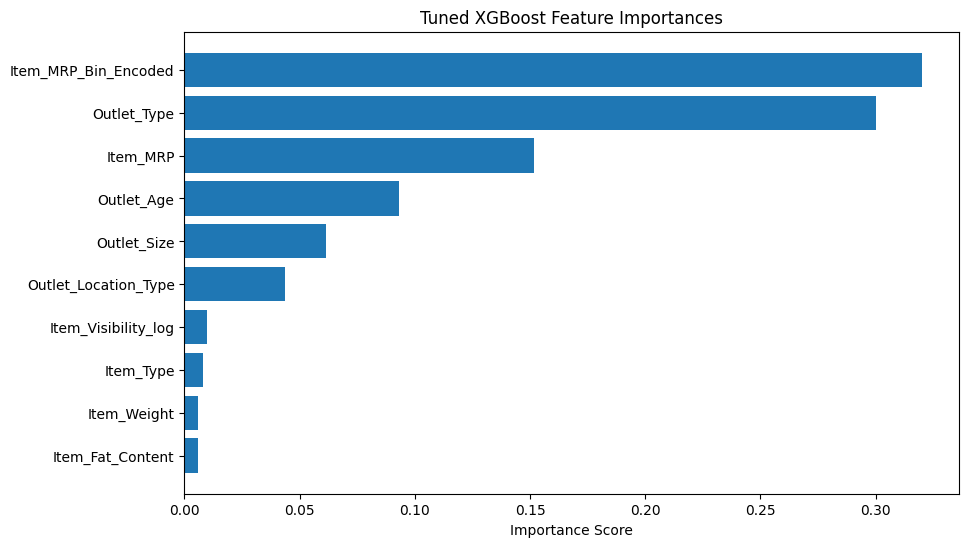

Top features by importance:
                Feature  Importance
5  Item_MRP_Bin_Encoded    0.320300
9           Outlet_Type    0.300131
4              Item_MRP    0.151741
6            Outlet_Age    0.093034
7           Outlet_Size    0.061484
8  Outlet_Location_Type    0.043602
2   Item_Visibility_log    0.009867
3             Item_Type    0.008012
0           Item_Weight    0.006118
1      Item_Fat_Content    0.005709


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = best_xgb_extended.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Tuned XGBoost Feature Importances")
plt.xlabel("Importance Score")
plt.show()

print("Top features by importance:")
print(importance_df)
